# Linear Algebra in Neuroscience

Dimensionality reduction techniques

In [261]:
import numpy as np
from scipy.linalg import null_space
from sympy import symbols, Matrix, Eq, solve
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg


# Eigendecomposition

In [262]:
# Create square matrix of dimension 2 by 2
X = np.array([[1, 2],
              [1, 3]])

# Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(X)

# Sort eigenvalues, eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]  # descending order

# Sort eigenvalues and eigenvectors using these indices
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Print the results with clear association between eigenvalues and eigenvectors
print("Eigenvalues and Corresponding Eigenvectors:")

for i in range(len(eigenvalues)):
    print(f"Eigenvalue {round(eigenvalues[i], 2)} => Eigenvector {np.round(eigenvectors[:, i], 2)}")


Eigenvalues and Corresponding Eigenvectors:
Eigenvalue 3.73 => Eigenvector [-0.59 -0.81]
Eigenvalue 0.27 => Eigenvector [-0.94  0.34]


## eigendecomposition 'by hand'

In [2]:
def compute_eigenvalues_and_eigenvectors(X):
    """ 
    Eigendecomposition by hand.
    Inputs:
        - X: square matrix of real numbers (of any dimension)
    Outputs:
        - eigenvectors (unsorted)
        - eigenvalues  (unsorted)

    This function only works solutions are not complex.
    """

    # Step 1: Compute the characteristic polynomial
    λ = symbols('λ')  # Define λ as a symbolic variable
    I = np.eye(X.shape[0])  # Identity matrix of the same size as X
    
    # Create the matrix (X - λI)
    char_matrix = Matrix(X) - λ * Matrix(I)
    
    # Compute the characteristic polynomial by finding the determinant of (X - λI)
    char_poly = char_matrix.det()
    
    # Step 2: Solve the characteristic polynomial (roots of the polynomial are the eigenvalues)
    eigenvalues = solve(char_poly, λ)
    
    # Step 3: Compute eigenvectors for each eigenvalue
    eigenvectors = {}

    for eig in eigenvalues:
        
        # Compute the matrix (X - λI) for each eigenvalue
        A = Matrix(X) - eig * Matrix(I)
        
        # Compute the null space of (X - λI) which gives the eigenvector
        ns = null_space(np.array(A).astype(float))  # Convert to NumPy array before passing
        
        # Store the eigenvectors in a dictionary
        eigenvectors[eig] = [np.round(vec, 2) for vec in ns.T]  # Round eigenvectors for cleaner output    

    return char_matrix, char_poly, eigenvectors
    
# Example usage:
X = np.array([[1, 2], 
              [1, 3]])

char_matrix, char_poly, eigenvectors_byhand = compute_eigenvalues_and_eigenvectors(X)

In [3]:
Matrix(X)

Matrix([
[1, 2],
[1, 3]])

In [4]:
char_matrix

Matrix([
[1 - 1.0*λ,         2],
[        1, 3 - 1.0*λ]])

In [5]:
char_poly

1.0*λ**2 - 4.0*λ + 1

In [18]:
print("\neigendecomposition 'by hand'")
# print outputs of eigendecomposition by hand
for eig_i in eigenvectors_byhand:
    print('Eigenvalue ' + str(eig_i.evalf(2)) + ' => Eigenvector ' + str(eigenvectors_byhand[eig_i]))



eigendecomposition 'by hand'
Eigenvalue 0.27 => Eigenvector [array([ 0.94, -0.34])]
Eigenvalue 3.7 => Eigenvector [array([0.59, 0.81])]


In [263]:
print('\neigendecomposition with np.linalg.eig(X)')

# print outputs of eig(X)
for i in range(len(eigenvalues)):
    print(f"Eigenvalue {round(eigenvalues[i], 2)} => Eigenvector {np.round(eigenvectors[:, i], 2)}")



eigendecomposition with np.linalg.eig(X)
Eigenvalue 3.73 => Eigenvector [-0.59 -0.81]
Eigenvalue 0.27 => Eigenvector [-0.94  0.34]


Note the sign ambiguity in eigenvectors. This is expected, as eigenvectors are basis vectors spanning the entire line, meaning they can be scaled by any non-zero constant, including a change in sign.

## eigendecomposition as diagonalization

Eigendecomposition is finding the set of basis vectors (eigenvectors) such that the matrix is diagonal in that basis vectors. This is why eigendecomposition is sometimes called diagonalization. 

Not all square matrices are diagonalizable, only those that satisfy

X = V^(-1) * Λ * V

where X is the square matrix to diagonalize, V is the eigenvector matrix (each column is an eigenvector), and Λ (lambda) is the eigenvalue matrix (eigenvalues in the diagonal).

In eigendecomposition, it is possible to reconstruct the original matrix only if the matrix is diagonalizable. Note
 that all symmetric matrices are diagonalizable.


In [264]:
## diagonalization of diagonalizabel matrix X (symmetric matrix)

# Create square matrix of dimension 3 by 3
X = np.array([[6, 2, 0],
              [2, 6, 1],
              [0, 1, 6]])

# Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(X)

# compute A = V^(-1) * Λ * V
Lambda = np.diag(eigenvalues)
eigenvectors_inv = np.linalg.inv(eigenvectors)
X_recon = eigenvectors @ Lambda @ eigenvectors_inv

print('\nOriginal matrix:')
print(X)

print('\nReconstructed matrix:')
print(np.round(X_recon))



Original matrix:
[[6 2 0]
 [2 6 1]
 [0 1 6]]

Reconstructed matrix:
[[6. 2. 0.]
 [2. 6. 1.]
 [0. 1. 6.]]


In [265]:
## diagonalization of non-diagonalizabel matrix X

# Create square matrix of dimension 2 by 2
X = np.array([[6, 2, 0],
              [0, 6, 1],
              [0, 0, 6]])

# Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(X)

# compute A = V^(-1) * Λ * V
Lambda = np.diag(eigenvalues)
eigenvectors_inv = np.linalg.inv(eigenvectors)
X_recon = eigenvectors @ Lambda @ eigenvectors_inv

print('\nOriginal matrix:')
print(X)

print('\nReconstructed matrix:')
print(X_recon)



Original matrix:
[[6 2 0]
 [0 6 1]
 [0 0 6]]

Reconstructed matrix:
[[6.   0.5  0.  ]
 [0.   6.   0.25]
 [0.   0.   6.  ]]


# Singular Value Decomposition (SVD)

Generalization of eigendecomposition for non-square matrices.

In an square matrix X, left singular vectors (U) equal the eigenvectors of X * X.T, while right singular values (V) equal the eigenvectors of X.T * X

In [266]:
### SVD of square matrix

# Example data: a 3x3 matrix
data = np.array([[1, 2, 3],
                 [2, 5, 5],
                 [1, 6, 9]])

# Perform SVD
U, S, V = np.linalg.svd(data)

# Sort singular values and corresponding vectors
sorted_indices_svd = np.argsort(S)[::-1]  # Indices to sort in descending order
S_sorted = S[sorted_indices_svd]  # Sorted singular values
U_sorted = U[:, sorted_indices_svd]  # Reorder U according to sorted singular values
V_sorted = V[sorted_indices_svd, :]  # Reorder V according to sorted singular values

# Step 2: Reconstruct the original data
# Convert sorted S (1D array) into a diagonal matrix
S_matrix_sorted = np.diag(S_sorted)

# Reconstruct the original data using sorted SVD
reconstructed_data = U_sorted @ S_matrix_sorted @ V_sorted

# Verify the reconstruction
print("\nOriginal data:")
print(data)

print("\nReconstructed data (USV):")
print(reconstructed_data)




Original data:
[[1 2 3]
 [2 5 5]
 [1 6 9]]

Reconstructed data (USV):
[[1. 2. 3.]
 [2. 5. 5.]
 [1. 6. 9.]]


In [24]:
print('\nLeft Singular Vectors (U):')
print(np.round(U_sorted, 2))

# Eigenvectors of data * data.T
eigenvalues, eigenvectors = np.linalg.eig(data @ data.T)

# Sort eigenvalues and corresponding eigenvectors
sorted_indices_eig = np.argsort(eigenvalues)[::-1]  # Indices to sort in descending order
eigenvalues_sorted = eigenvalues[sorted_indices_eig]  # Sorted eigenvalues
eigenvectors_sorted = eigenvectors[:, sorted_indices_eig]  # Reorder eigenvectors

print('\nEigenvectors of data * data.T:')
print(np.round(eigenvectors_sorted, 2))




Left Singular Vectors (U):
[[-0.27 -0.1  -0.96]
 [-0.53 -0.81  0.24]
 [-0.8   0.58  0.17]]

Eigenvectors of data * data.T:
[[ 0.27 -0.1   0.96]
 [ 0.53 -0.81 -0.24]
 [ 0.8   0.58 -0.17]]


In [267]:
print('\nRight Singular Vectors (VT):')
print(np.round(V_sorted.T, 2))

# Eigenvectors of data * data.T
eigenvalues, eigenvectors = np.linalg.eig(data.T @ data)

# Sort eigenvalues and corresponding eigenvectors
sorted_indices_eig = np.argsort(eigenvalues)[::-1]  # Indices to sort in descending order
eigenvalues_sorted = eigenvalues[sorted_indices_eig]  # Sorted eigenvalues
eigenvectors_sorted = eigenvectors[:, sorted_indices_eig]  # Reorder eigenvectors

print('\nEigenvectors of data.T * data:')
print(np.round(eigenvectors_sorted, 2))



Right Singular Vectors (VT):
[[-0.16 -0.7  -0.69]
 [-0.59 -0.49  0.64]
 [-0.79  0.51 -0.34]]

Eigenvectors of data.T * data:
[[-0.16 -0.7   0.69]
 [-0.59 -0.49 -0.64]
 [-0.79  0.51  0.34]]


In a rectangular matrix X (2 by 4), left singular vectors (U) equal the eigenvectors of X * X.T. 

Right singular vectors (Vt) equal the first two eigenvectors of X.T * X, and the other two eigenvectors are the null space of X (with zero eigenvalues).

In [27]:
### SVD of rectangular matrix

# Example data: a 3x3 matrix
data = np.array([[1, 2, 3, 1],
                 [1, 6, 9, 1]])

# Perform SVD
U, S, V = np.linalg.svd(data)

# Sort singular values and corresponding vectors
sorted_indices_svd = np.argsort(S)[::-1]  # Indices to sort in descending order
S_sorted = S[sorted_indices_svd]  # Sorted singular values
U_sorted = U[:, sorted_indices_svd]  # Reorder U according to sorted singular values
V_sorted = V[sorted_indices_svd, :]  # Reorder V according to sorted singular values

# Step 2: Reconstruct the original data
# Convert sorted S (1D array) into a diagonal matrix
S_matrix_sorted = np.diag(S_sorted)

# Reconstruct the original data using sorted SVD
reconstructed_data = U_sorted @ S_matrix_sorted @ V_sorted

# Verify the reconstruction
print("\nOriginal data:")
print(data)

print("\nReconstructed data (USV):")
print(reconstructed_data)




Original data:
[[1 2 3 1]
 [1 6 9 1]]

Reconstructed data (USV):
[[1. 2. 3. 1.]
 [1. 6. 9. 1.]]


In [28]:
print('\nLeft Singular Vectors (U):')
print(np.round(U_sorted, 2))

# Eigenvectors of data * data.T
eigenvalues, eigenvectors = np.linalg.eig(data @ data.T)

# Sort eigenvalues and corresponding eigenvectors
sorted_indices_eig = np.argsort(eigenvalues)[::-1]  # Indices to sort in descending order
eigenvalues_sorted = eigenvalues[sorted_indices_eig]  # Sorted eigenvalues
eigenvectors_sorted = eigenvectors[:, sorted_indices_eig]  # Reorder eigenvectors

print('\nEigenvectors of data * data.T:')
print(np.round(eigenvectors_sorted, 2))



Left Singular Vectors (U):
[[-0.33 -0.94]
 [-0.94  0.33]]

Eigenvectors of data * data.T:
[[-0.33 -0.94]
 [-0.94  0.33]]


In [29]:
print('\nRight Singular Vectors (VT):')
print(np.round(V_sorted.T, 2))

# Eigenvectors of data * data.T
eigenvalues, eigenvectors = np.linalg.eig(data.T @ data)

# Sort eigenvalues and corresponding eigenvectors
sorted_indices_eig = np.argsort(eigenvalues)[::-1]  # Indices to sort in descending order
eigenvalues_sorted = eigenvalues[sorted_indices_eig]  # Sorted eigenvalues
eigenvectors_sorted = eigenvectors[:, sorted_indices_eig]  # Reorder eigenvectors

print('\nEigenvectors of data.T * data:')
print(np.round(eigenvectors_sorted, 2))

print('\ndata * null space of data:')
print(data @ eigenvectors_sorted[:,2:3])



Right Singular Vectors (VT):
[[-0.11 -0.7 ]
 [-0.55  0.09]
 [-0.82  0.13]
 [-0.11 -0.7 ]]

Eigenvectors of data.T * data:
[[-0.11  0.7   0.    0.69]
 [-0.55 -0.09  0.83  0.16]
 [-0.82 -0.13 -0.55 -0.11]
 [-0.11  0.7  -0.   -0.69]]

data * null space of data:
[[0.]
 [0.]]


In a symmetric matrix (A = A^T), U and V.T are the same, since A * A.T is the same than A.T * A (in both cases, it equals A^2)

In [ ]:
### SVD of Symmetric matrix

# Example data: a 3x3 matrix
data = np.array([[1, 2, 1],
                 [2, 5, 5],
                 [1, 5, 9]])

# Step 1: Perform SVD
U, S, V = np.linalg.svd(data)

# Step 2: Reconstruct the original data
# Convert S (1D array) into a diagonal matrix
S_matrix = np.diag(S)

# Since SVD decomposes as data = U * S * V,
# to reconstruct, we multiply them back together
reconstructed_data_USV = U @ S_matrix @ V

# Verify the reconstruction
print("\nOriginal data:")
print(data)

print("\nReconstructed data USV:")
print(reconstructed_data_USV)

print('\nLeft Singular Vectors:')
print(np.round(U,2))

print('\nRight Singular Vectors (transposed):')
print(np.round(V.T,2))




Original data:
[[1 2 1]
 [2 5 5]
 [1 5 9]]

Reconstructed data USV:
[[1. 2. 1.]
 [2. 5. 5.]
 [1. 5. 9.]]

Left Singular Vectors:
[[-0.17 -0.54 -0.83]
 [-0.57 -0.63  0.53]
 [-0.81  0.56 -0.2 ]]

Right Singular Vectors (transposed):
[[-0.17 -0.54  0.83]
 [-0.57 -0.63 -0.53]
 [-0.81  0.56  0.2 ]]


In [269]:
### Low-rank approximation

# Example data: a 3x3 matrix
data = np.array([[1, 2, 1, 1, 0, 1],
                 [2, 0, 5, 2, 3, 2],
                 [2, 5, 1, 2, 3, 2],
                 [1, 5, 9, 1, 5, 4]])

# Step 3: Perform SVD
U, S, Vt = np.linalg.svd(data, full_matrices=False)  # Use full_matrices=False to keep shapes correct

# Construct S as a rectangular diagonal matrix
S_matrix = np.diag(S)

# Since SVD decomposes as data = U * S * V,
# to reconstruct, we multiply them back together
reconstructed_data_USV = U @ S_matrix @ Vt

# low-rank approximation (number of eigenvectors used to reconstruct the data)
k = 2 # play with this value to reconstruct low-rank approximations of the data if k < min(data.shape)

# Optional: Reconstruct the covariance matrix from SVD
S_matrix = np.diag(S)  # Convert singular values to diagonal matrix
low_rank_reconstructed_data = U[:,:k] @ S_matrix[:k,:k] @ Vt[:k,:]

# Verify the reconstruction
print("\nOriginal data:")
print(data)

print("\nLow-rank approximation of data:")
print(np.round(low_rank_reconstructed_data,2))

# attention in python U[:,:k] @ S_matrix[:k,:k] @ V[:k,:]
# but in matlab, it should be columns of V instead of rows,
# because matlab returns V, while python returns Vt



Original data:
[[1 2 1 1 0 1]
 [2 0 5 2 3 2]
 [2 5 1 2 3 2]
 [1 5 9 1 5 4]]

Low-rank approximation of data:
[[0.6  1.91 0.7  0.6  1.   0.81]
 [0.67 0.94 5.39 0.67 2.58 1.95]
 [1.64 5.37 1.24 1.64 2.51 2.04]
 [1.9  4.37 8.75 1.9  5.25 4.04]]


# Principal Component Analysis

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

The Iris dataset is a well-known dataset in machine learning and statistics, consisting of 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width, all measured in centimeters. The dataset contains three species of iris flowers—Setosa, Versicolor, and Virginica, with 50 samples from each species. It is commonly used for classification tasks, where the goal is to predict the species of a flower based on its measurements. The dataset is small, well-balanced, and easy to understand, making it ideal for demonstrating and testing various machine learning algorithms and statistical techniques.

shape of dataset:
(150, 4)
number of labels:
(150,)


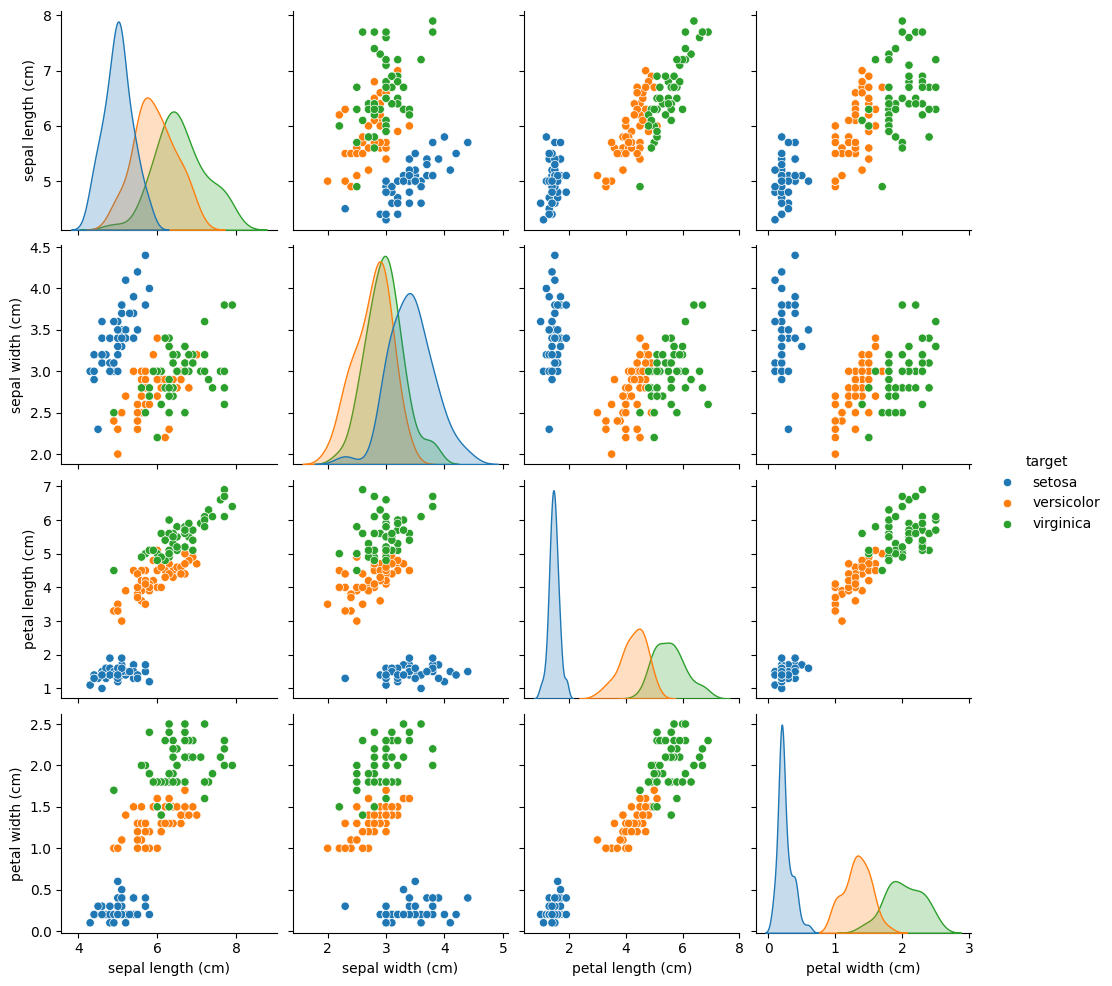

In [270]:
from sklearn.datasets import load_iris
import seaborn as sns

# load and plot data
iris = load_iris(as_frame=True)

# Rename classes using the iris target names
iris.frame["target"] = iris.target_names[iris.target]
_ = sns.pairplot(iris.frame, hue="target")

# print shape of dataset
print('shape of dataset:')
print(iris.data.shape)
print('number of labels:')
print(iris.target.shape)


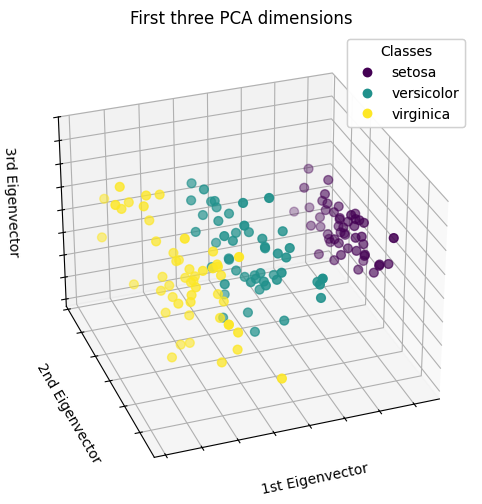

In [ ]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()

PCA will create 3 new features that are a linear combination of the 4 original features. In addition, this transformation maximizes the variance. With this transformation, we see that we can identify each species using only the first feature (i.e., first eigenvector).



# Generalized eigendecomposition

In [271]:
number_timepoints = 2000
number_channels = 100

# Generate two random symmetric matrices
S = np.random.randn(number_channels, number_timepoints)
S = S @ S.T  # Make it symmetric positive semi-definite

R = np.random.randn(number_channels, number_timepoints)
R = R @ R.T  # Make it symmetric positive semi-definite

# Generalized Eigenvalue Decomposition
eigvals, eigvecs = scipy.linalg.eig(S, R)

# Print results
print("Eigenvalues:\n", eigvals.shape)
print("Eigenvectors:\n", eigvecs.shape)


Eigenvalues:
 (100,)
Eigenvectors:
 (100, 100)


# neural manifold (noiseless)

This code simulates the tuning curves of 500 neurons in response to 90 stimuli arranged in a circular structure (one stimulus for every 4 degrees), such as those found in tasks involving orientation or color.

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
### simulate tuning curves

# Number of neurons and stimuli
num_neurons = 500
num_stimuli = 90

# Stimuli positions (evenly spaced on a circle, increased number of stimuli)
stimuli_angles = np.linspace(0, 2 * np.pi, num_stimuli, endpoint=False)

# Tuning curve parameters
sigma = np.pi / 6  # Standard deviation of Gaussian function (tuning width)

# Function to calculate the tuning curve for a neuron with Gaussian distribution
def tuning_curve(neuron_angle, stimuli_angles, sigma):
    # Initialize response array
    response = np.zeros(len(stimuli_angles))
    
    # Generate a Gaussian response centered around the neuron's preferred stimulus
    for i, stimulus_angle in enumerate(stimuli_angles):
        # Calculate the circular distance between the neuron and the stimulus
        dist = np.abs(neuron_angle - stimulus_angle)
        dist = np.minimum(dist, 2 * np.pi - dist)  # Ensure circular distance is wrapped to [0, pi]
        
        # Simulate response using Gaussian distribution
        response[i] = np.exp(-0.5 * (dist / sigma) ** 2)
    
    # Normalize the response such that the peak is 1
    response /= response.max()
    return response

# Randomly distribute neurons' preferred stimulus (0 to 2*pi)
neuron_angles = np.random.uniform(0, 2 * np.pi, num_neurons)

# Create the tuning curves for each neuron
tuning_curves = np.array([tuning_curve(neuron_angle, stimuli_angles, sigma) for neuron_angle in neuron_angles])

print('data shape')
print(tuning_curves.shape)


data shape
(500, 90)


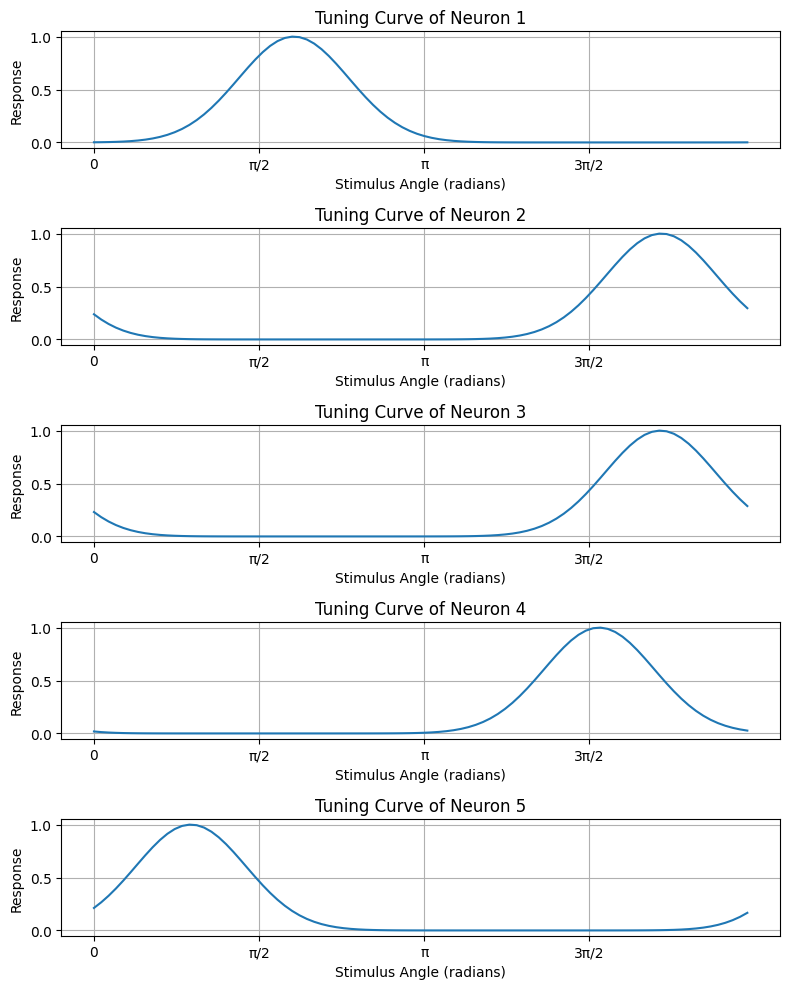

In [224]:
## plot 5 neurons

# Subset of neurons to plot (e.g., first 10 neurons)
subset_neurons = 5

# Plotting tuning curves for a subset of neurons
fig, axes = plt.subplots(subset_neurons, 1, figsize=(8, 2 * subset_neurons))

# Set x-tick positions at 0, π/2, π, and 3π/2 (equally spaced 90-degree intervals)
tick_positions = np.linspace(0, 2 * np.pi, 5)[:-1]  # 4 values (0, π/2, π, 3π/2)

# Corresponding labels for the tick positions
tick_labels = ['0', 'π/2', 'π', '3π/2']

for i in range(subset_neurons):
    axes[i].plot(stimuli_angles, tuning_curves[i], label=f'Neuron {i+1}')
    axes[i].set_xlabel('Stimulus Angle (radians)')
    axes[i].set_ylabel('Response')
    axes[i].set_title(f'Tuning Curve of Neuron {i+1}')
    
    # Set x-ticks and labels at the desired positions
    axes[i].set_xticks(tick_positions)
    axes[i].set_xticklabels(tick_labels)
    
    axes[i].grid(True)

plt.tight_layout()
plt.show()


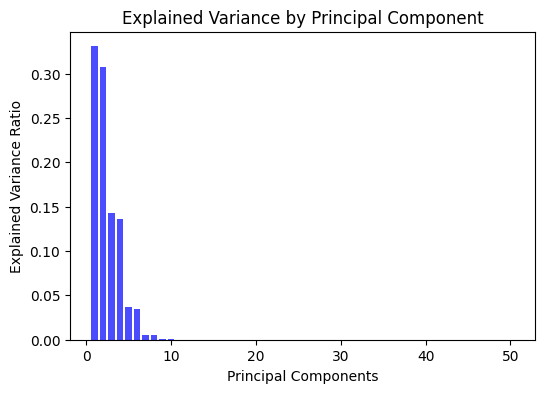

In [225]:
### PCA and variance explained

# Perform PCA to reduce dimensionality
pca = PCA(n_components=50)  # Reduce to 50 principal components
reduced_data = pca.fit_transform(tuning_curves)

# Optionally, plot the explained variance ratio for each principal component
plt.figure(figsize=(6, 4))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.7, color='b')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.show()


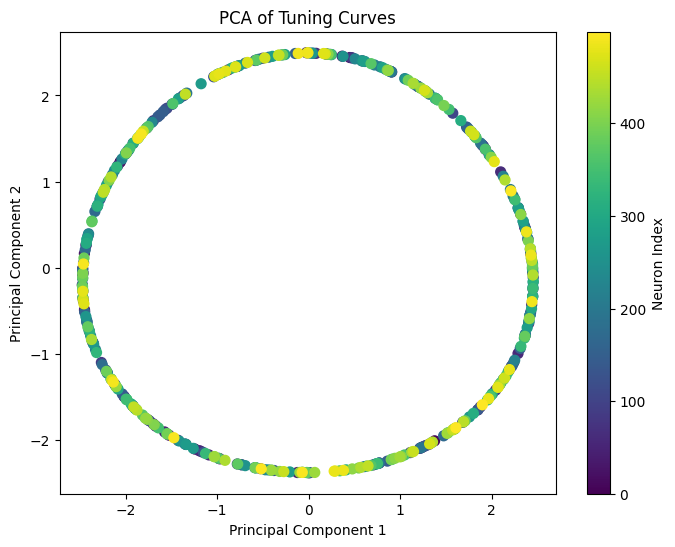

In [226]:
## plot 2 leading components

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 principal components
reduced_data = pca.fit_transform(tuning_curves)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=np.arange(num_neurons), cmap='viridis', s=50)
plt.colorbar(label='Neuron Index')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Tuning Curves')
plt.show()


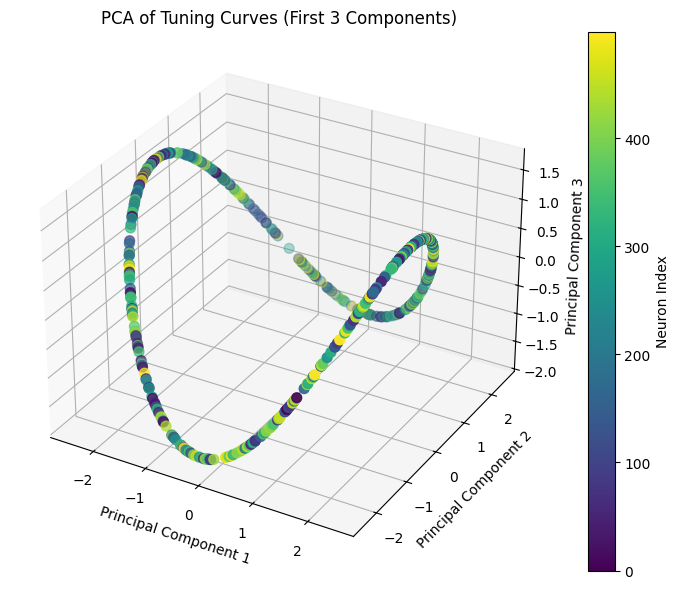

In [227]:
# Perform PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)  # Reduce to 3 principal components
reduced_data = pca.fit_transform(tuning_curves)

# Plot the results in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first 3 principal components
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=np.arange(num_neurons), cmap='viridis', s=50)

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Tuning Curves (First 3 Components)')

# Add color bar using the scatter object
plt.colorbar(scatter, label='Neuron Index')

plt.show()


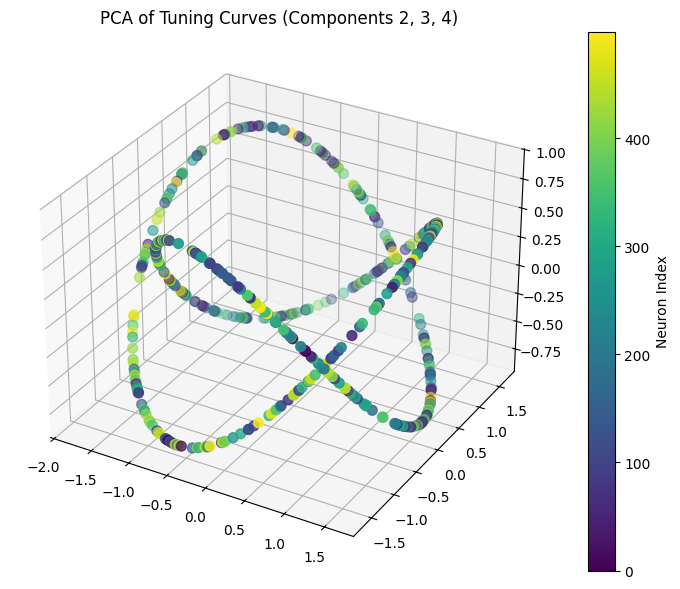

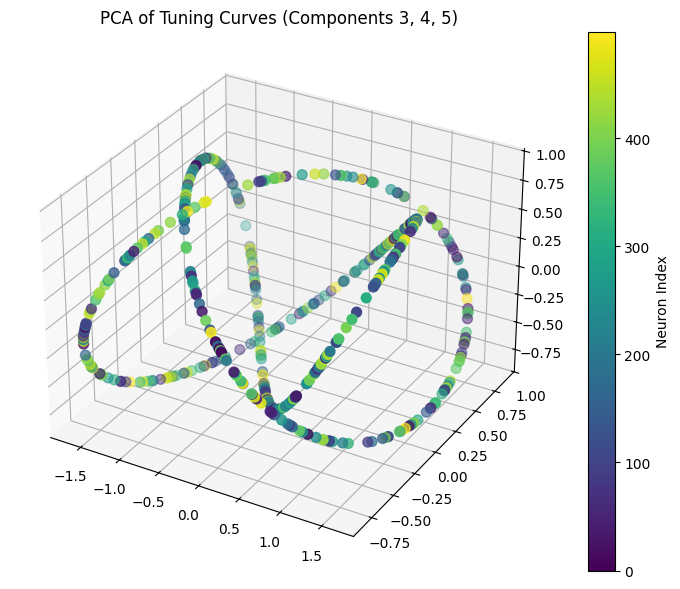

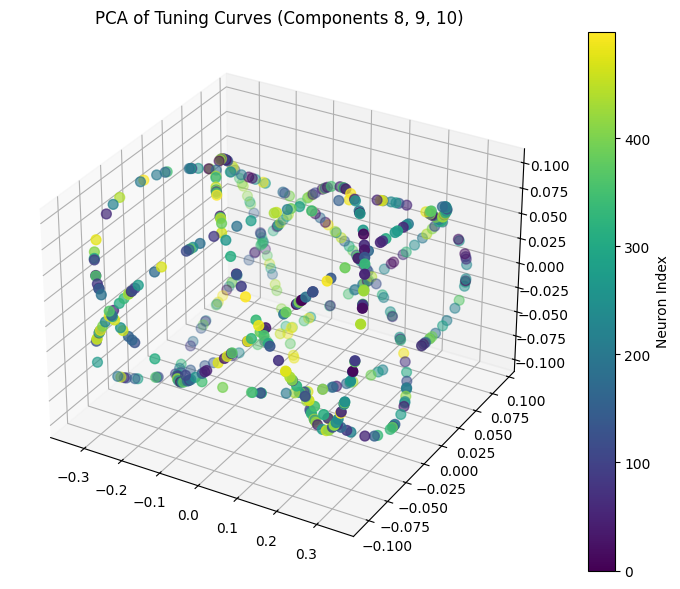

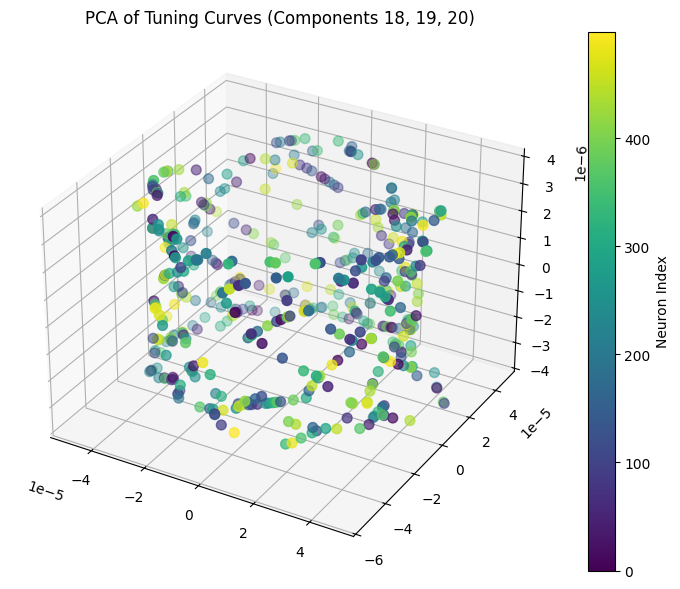

In [ ]:
# Perform PCA to reduce dimensionality to 6 components
pca = PCA(n_components=50)  # Reduce to 6 principal components
reduced_data = pca.fit_transform(tuning_curves)

# Plot the results in 3D for components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_data[:, 2], reduced_data[:, 3], reduced_data[:, 4], c=np.arange(num_neurons), cmap='viridis', s=50)
ax.set_title('PCA of Tuning Curves (Components 2, 3, 4)')
plt.colorbar(scatter, label='Neuron Index')
plt.show()

# Plot the results in 3D for components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_data[:, 3], reduced_data[:, 4], reduced_data[:, 5], c=np.arange(num_neurons), cmap='viridis', s=50)
ax.set_title('PCA of Tuning Curves (Components 3, 4, 5)')
plt.colorbar(scatter, label='Neuron Index')
plt.show()

# Plot the results in 3D for components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_data[:, 7], reduced_data[:, 8], reduced_data[:, 9], c=np.arange(num_neurons), cmap='viridis', s=50)
ax.set_title('PCA of Tuning Curves (Components 8, 9, 10)')
plt.colorbar(scatter, label='Neuron Index')
plt.show()

# Plot the results in 3D for components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_data[:, 17], reduced_data[:, 18], reduced_data[:, 19], c=np.arange(num_neurons), cmap='viridis', s=50)
ax.set_title('PCA of Tuning Curves (Components 18, 19, 20)')
plt.colorbar(scatter, label='Neuron Index')
plt.show()




# neural manifolds + noise

Add noise to the simulated tuning curves.

In [256]:
### simulate tuning curves with noise

# Number of neurons and stimuli
num_neurons = 500
num_stimuli = 90

# Stimuli positions (evenly spaced on a circle, increased number of stimuli)
stimuli_angles = np.linspace(0, 2 * np.pi, num_stimuli, endpoint=False)

# Tuning curve parameters
sigma = np.pi / 6  # Standard deviation of Gaussian function (tuning width)
noise_std = 0.2  # Standard deviation of the noise (adjust as needed)

# Function to calculate the tuning curve for a neuron with Gaussian distribution
def tuning_curve(neuron_angle, stimuli_angles, sigma, noise_std):
    # Initialize response array
    response = np.zeros(len(stimuli_angles))
    
    # Generate a Gaussian response centered around the neuron's preferred stimulus
    for i, stimulus_angle in enumerate(stimuli_angles):
        # Calculate the circular distance between the neuron and the stimulus
        dist = np.abs(neuron_angle - stimulus_angle)
        dist = np.minimum(dist, 2 * np.pi - dist)  # Ensure circular distance is wrapped to [0, pi]
        
        # Simulate response using Gaussian distribution
        response[i] = np.exp(-0.5 * (dist / sigma) ** 2)
    
    # Normalize the response such that the peak is 1
    response /= response.max()
    
    # Add Gaussian noise to the response
    noise = np.random.normal(0, noise_std, size=response.shape)
    response += noise
    
    # Clip the response values to be within the valid range [0, 1]
    response = np.clip(response, 0, 1)
    
    return response

# Randomly distribute neurons' preferred stimulus (0 to 2*pi)
neuron_angles = np.random.uniform(0, 2 * np.pi, num_neurons)

# Create the tuning curves for each neuron with noise
tuning_curves = np.array([tuning_curve(neuron_angle, stimuli_angles, sigma, noise_std) for neuron_angle in neuron_angles])


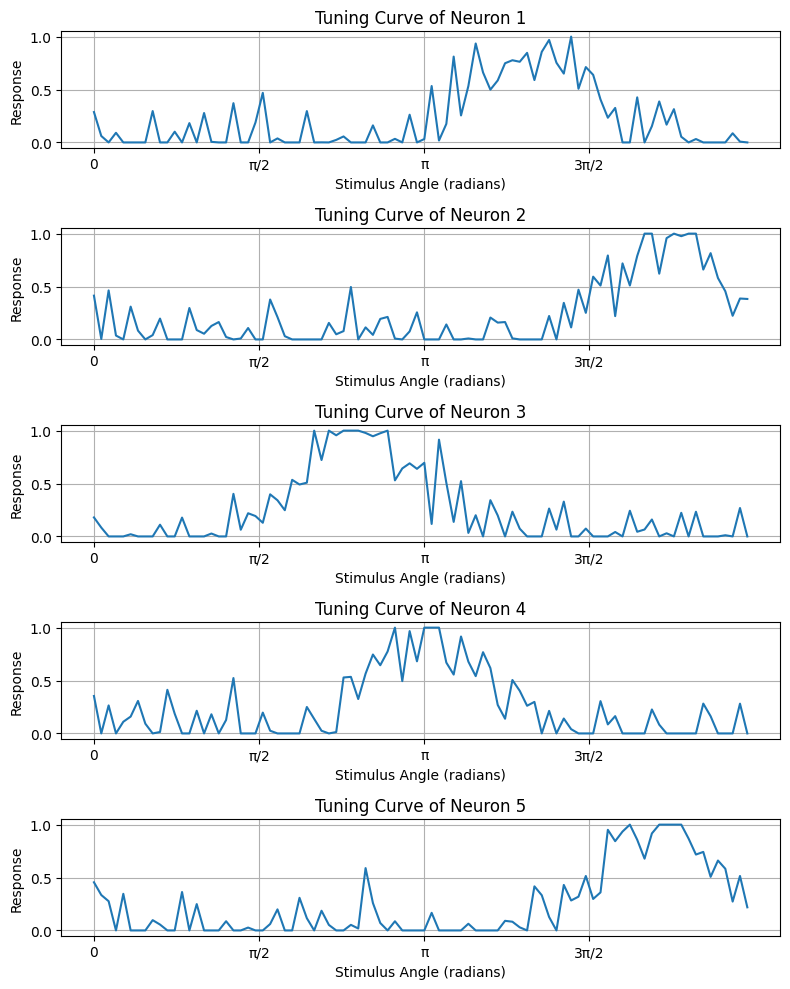

In [257]:
## plot 5 neurons

# Subset of neurons to plot (e.g., first 10 neurons)
subset_neurons = 5

# Plotting tuning curves for a subset of neurons
fig, axes = plt.subplots(subset_neurons, 1, figsize=(8, 2 * subset_neurons))

# Set x-tick positions at 0, π/2, π, and 3π/2 (equally spaced 90-degree intervals)
tick_positions = np.linspace(0, 2 * np.pi, 5)[:-1]  # 4 values (0, π/2, π, 3π/2)

# Corresponding labels for the tick positions
tick_labels = ['0', 'π/2', 'π', '3π/2']

for i in range(subset_neurons):
    axes[i].plot(stimuli_angles, tuning_curves[i], label=f'Neuron {i+1}')
    axes[i].set_xlabel('Stimulus Angle (radians)')
    axes[i].set_ylabel('Response')
    axes[i].set_title(f'Tuning Curve of Neuron {i+1}')
    
    # Set x-ticks and labels at the desired positions
    axes[i].set_xticks(tick_positions)
    axes[i].set_xticklabels(tick_labels)
    
    axes[i].grid(True)

plt.tight_layout()
plt.show()


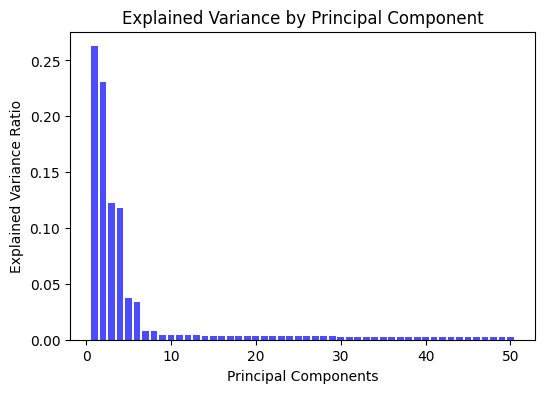

In [258]:
### PCA and variance explained

# Perform PCA to reduce dimensionality
pca = PCA(n_components=50)  # Reduce to 50 principal components
reduced_data = pca.fit_transform(tuning_curves)

# Optionally, plot the explained variance ratio for each principal component
plt.figure(figsize=(6, 4))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.7, color='b')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.show()


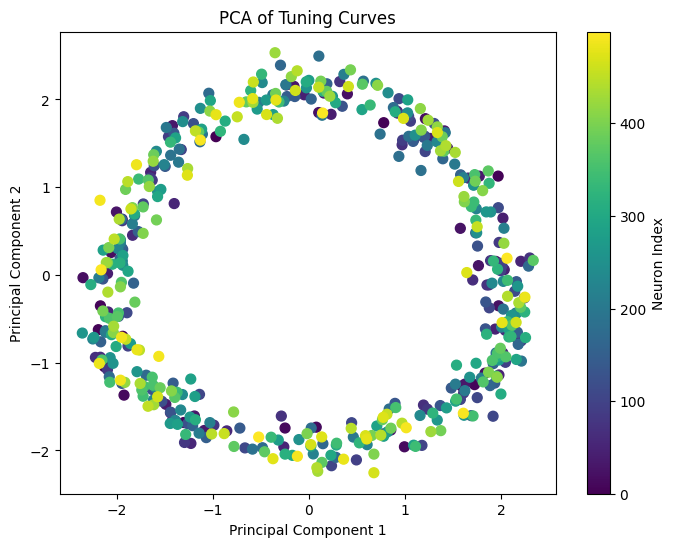

In [259]:
## plot 2 leading components

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 principal components
reduced_data = pca.fit_transform(tuning_curves)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=np.arange(num_neurons), cmap='viridis', s=50)
plt.colorbar(label='Neuron Index')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Tuning Curves')
plt.show()


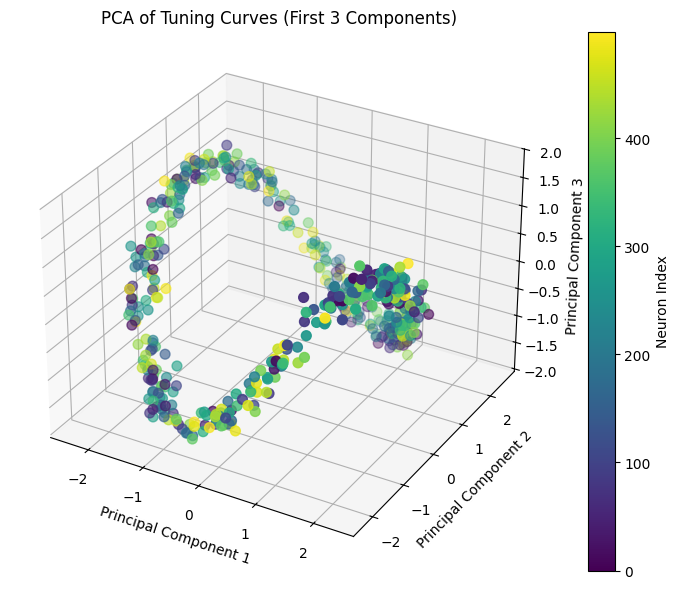

In [260]:
# Perform PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)  # Reduce to 3 principal components
reduced_data = pca.fit_transform(tuning_curves)

# Plot the results in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first 3 principal components
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=np.arange(num_neurons), cmap='viridis', s=50)

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Tuning Curves (First 3 Components)')

# Add color bar using the scatter object
plt.colorbar(scatter, label='Neuron Index')

plt.show()
